Использовал:

    1. LabelEncoder для кодирования категориальных столбцов (помогло)
    
    2. Isolation Forest и LOF (Local Outlier Factor) для поиска аномалий (не помогло, без этого метрики лучше)
    
    3. MinMaxScaler и StandardScaler для масштабирования данных (незначительно метрики лучше)
    
    4. Модели и метрики только те, которые были указаны в задании
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data = data.drop(columns = ["id", "name", "host_id", "host_name", "last_review"])

data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Обработка категориальных признаков

In [5]:
label_encoder = LabelEncoder()
data['neighbourhood_group'] = label_encoder.fit_transform(data['neighbourhood_group'])
data['neighbourhood'] = label_encoder.fit_transform(data['neighbourhood'])
data['room_type'] = label_encoder.fit_transform(data['room_type'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int32  
 1   neighbourhood                   48895 non-null  int32  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int32  
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 3.5 MB


In [6]:
def plot_distributions(data):
    for column in data.columns:
        plt.figure()
        sns.histplot(data[column])
        plt.title(f"Distribution of {column}")
        plt.show()
        
def plot_correlations(data, target_column):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    
    target_correlation = correlation_matrix[target_column]
    print(target_correlation)
    

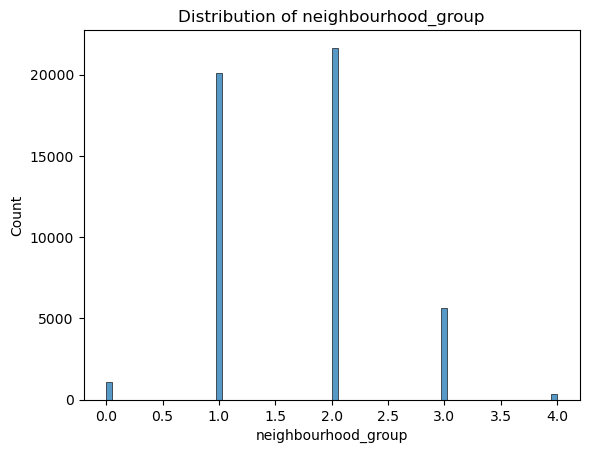

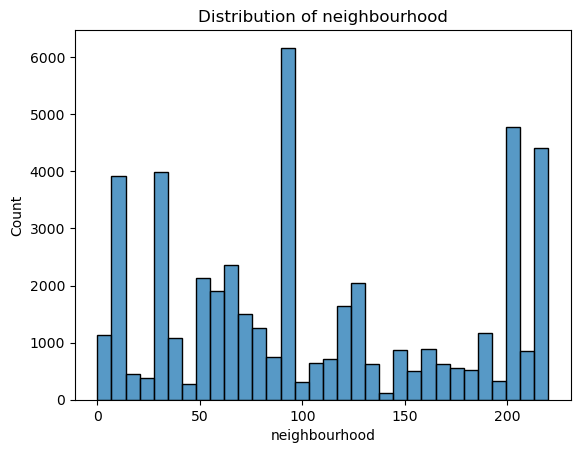

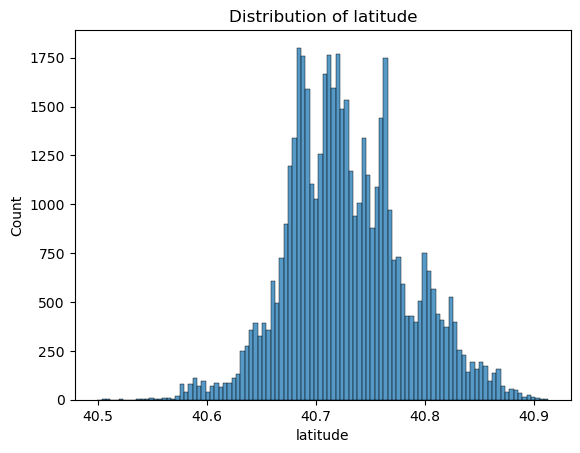

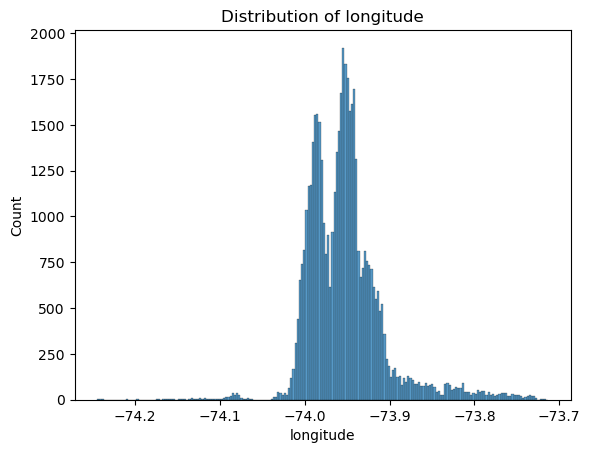

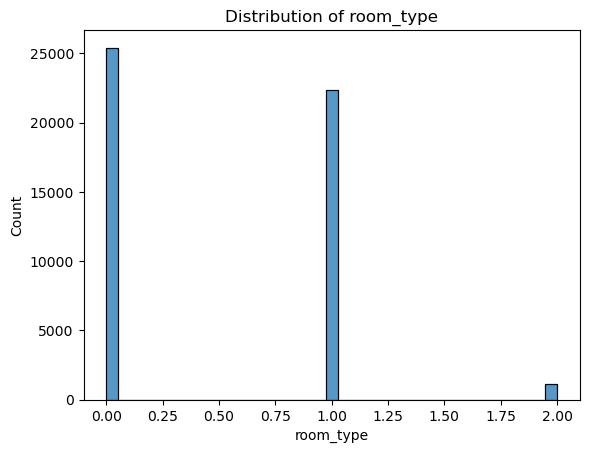

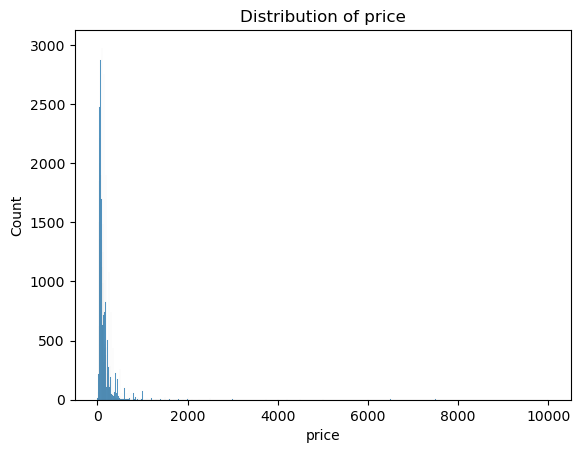

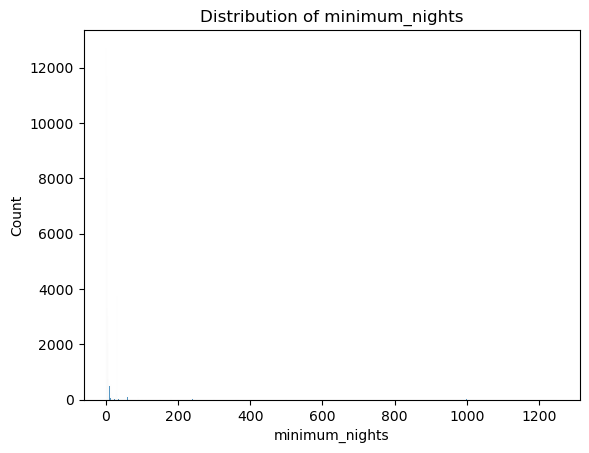

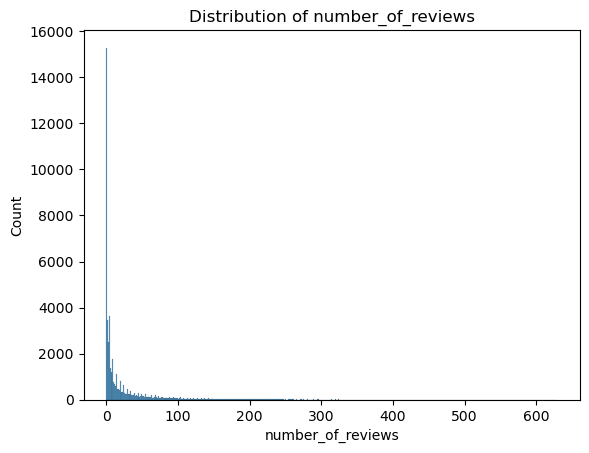

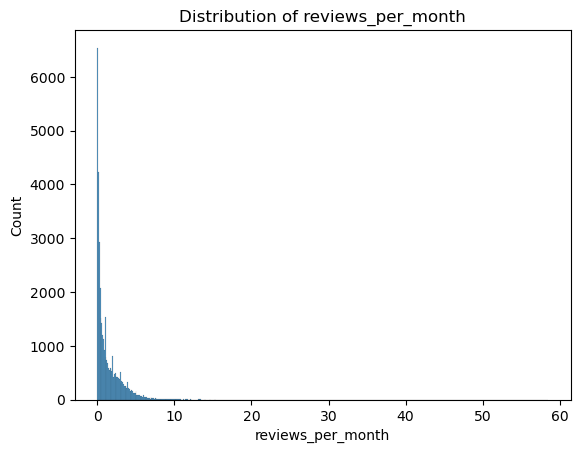

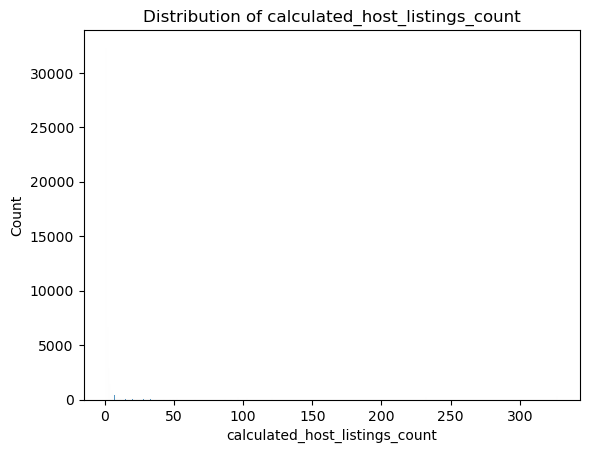

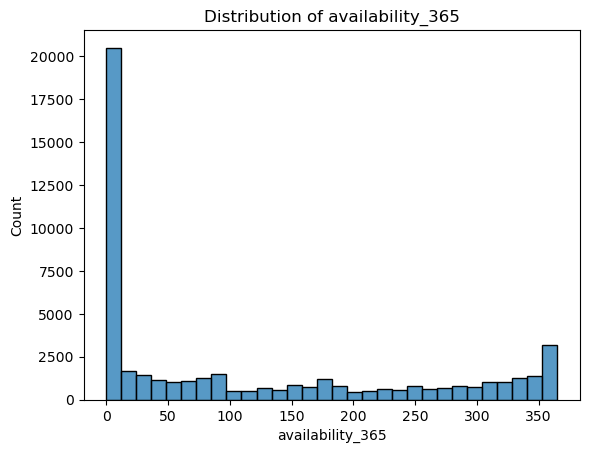

In [7]:
plot_distributions(data)

neighbourhood_group               0.044246
neighbourhood                     0.062057
latitude                          0.033939
longitude                        -0.150019
room_type                        -0.249350
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
availability_365                  0.081829
Name: price, dtype: float64


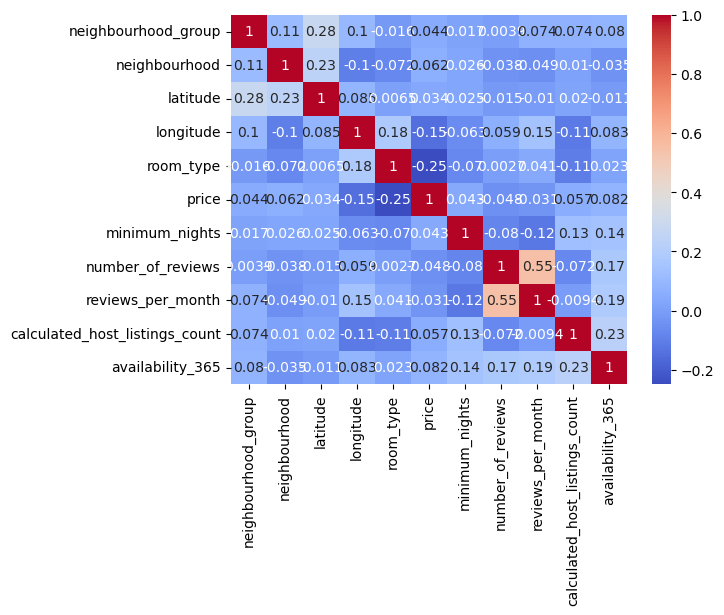

In [8]:
plot_correlations(data, 'price')

Из среднего количества отзывов за месяц и обзего количества отзывов оставлю только первое.

А так, данные не коррелируют между собой, что не может не радовать.

In [9]:
data = data.drop(columns = ['number_of_reviews'])

In [10]:
# sns.pairplot(data)

# plt.show()

# Часть 2. Preprocessing & Feature Engineering

## 1. Замена пропущенных значений

In [11]:
data['reviews_per_month'].fillna(0, inplace=True)

## 2. Обработка аномалий

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor


In [13]:
def plot_anomaly(anomaly_scores):
    plt.hist(anomaly_scores, bins=10)
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Anomaly Scores')
    plt.show()
    
def table_anomaly(data, anomaly_scores):
    anomaly_df = pd.DataFrame({'Object': data.index, 'Anomaly Score': anomaly_scores})
    top_anomalies = anomaly_df.sort_values(by='Anomaly Score', ascending=False).head(10)

    return top_anomalies

def drop_anomaly(data, anomaly_indices):
    return data.drop(anomaly_indices)

### Isolation Forest

In [14]:
isolation_forest = IsolationForest()

anomaly_scores_Isolation  = isolation_forest.fit_predict(data)

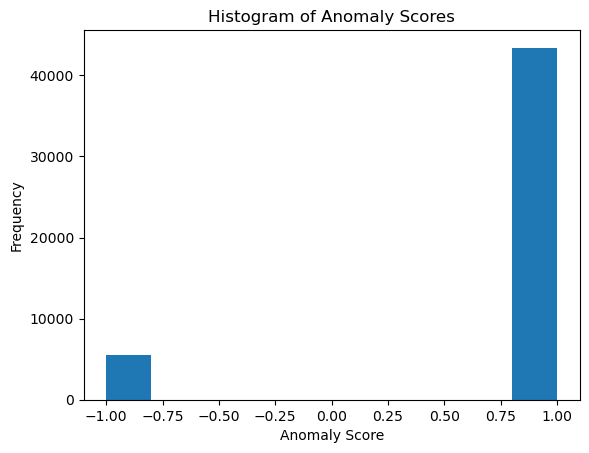

In [15]:
plot_anomaly(anomaly_scores_Isolation)

In [16]:
anomaly_table = table_anomaly(data, anomaly_scores_Isolation)

anomaly_table

,Object,Anomaly Score
0,0,1
30700,30700,1
30690,30690,1
30691,30691,1
30692,30692,1
30693,30693,1
30696,30696,1
30697,30697,1
30698,30698,1
30699,30699,1


In [17]:
anomaly_indices = anomaly_table['Object'].values

data_ed = drop_anomaly(data, anomaly_indices)

### LOF (Local Outlier Factor)

In [18]:
lof = LocalOutlierFactor()

anomaly_scores_lof = lof.fit_predict(data_ed)

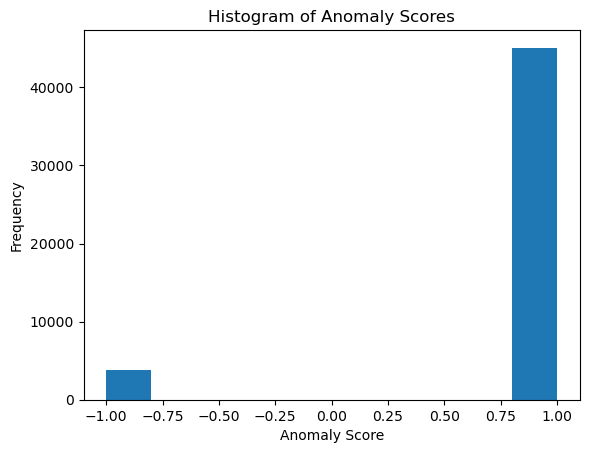

In [19]:
plot_anomaly(anomaly_scores_lof)

In [20]:
anomaly_table = table_anomaly(data_ed, anomaly_scores_lof)
                                
anomaly_table

,Object,Anomaly Score
0,1,1
31945,31955,1
31947,31957,1
31948,31958,1
31949,31959,1
31950,31960,1
31953,31963,1
31954,31964,1
31955,31965,1
31956,31966,1


In [21]:
anomaly_indices = anomaly_table['Object'].values

data_ed = drop_anomaly(data_ed, anomaly_indices)

## 3. Масштабирование данных

Попробую стандартизацию и масштабирование в диапазон

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max_scaler = MinMaxScaler()
stand_scaler = StandardScaler()


In [23]:
def pipeline(data, scaler):
    scaled_features = scaler.fit_transform(data[['latitude', 'longitude']])

    scaled_data = pd.DataFrame(scaled_features, columns=['scaled_latitude', 'scaled_longitude'])

    scal_data = pd.concat([data, scaled_data], axis=1)
    
    return scal_data

In [24]:
min_max_sc_data = pipeline(data, min_max_scaler)

stand_sc_data = pipeline(data, stand_scaler)

# Часть 3. Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [27]:
def pipeline_learning(data):

    data = data.dropna()
    
    X = data.drop(columns = ["price"])
    y = data.price
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    
    # Инициализация
    linear_reg = LinearRegression()
    ridge_cv = RidgeCV()
    lasso_cv = LassoCV()
    elastic_net_cv = ElasticNetCV()
    
    # Обучение
    linear_reg.fit(X_train, y_train)
    ridge_cv.fit(X_train, y_train)
    lasso_cv.fit(X_train, y_train)
    elastic_net_cv.fit(X_train, y_train)

    
    # Предсказание
    linear_reg_preds = linear_reg.predict(X_test)
    ridge_cv_preds = ridge_cv.predict(X_test)
    lasso_cv_preds = lasso_cv.predict(X_test)
    elastic_net_cv_preds = elastic_net_cv.predict(X_test)
    
    
    # Оценка качества 
    linear_reg_rmse = mean_squared_error(y_test, linear_reg_preds, squared=False)
    ridge_cv_rmse = mean_squared_error(y_test, ridge_cv_preds, squared=False)
    lasso_cv_rmse = mean_squared_error(y_test, lasso_cv_preds, squared=False)
    elastic_net_cv_rmse = mean_squared_error(y_test, elastic_net_cv_preds, squared=False)

    linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
    ridge_cv_mae = mean_absolute_error(y_test, ridge_cv_preds)
    lasso_cv_mae = mean_absolute_error(y_test, lasso_cv_preds)
    elastic_net_cv_mae = mean_absolute_error(y_test, elastic_net_cv_preds)

    linear_reg_r2 = r2_score(y_test, linear_reg_preds)
    ridge_cv_r2 = r2_score(y_test, ridge_cv_preds)
    lasso_cv_r2 = r2_score(y_test, lasso_cv_preds)
    elastic_net_cv_r2 = r2_score(y_test, elastic_net_cv_preds)
    
    # Выводы
    print("Linear Regression RMSE:", linear_reg_rmse)
    print("RidgeCV RMSE:", ridge_cv_rmse)
    print("LassoCV RMSE:", lasso_cv_rmse)
    print("ElasticNetCV RMSE:", elastic_net_cv_rmse)

    print()

    print("Linear Regression MAE:", linear_reg_mae)
    print("RidgeCV MAE:", ridge_cv_mae)
    print("LassoCV MAE:", lasso_cv_mae)
    print("ElasticNetCV MAE:", elastic_net_cv_mae)
    print()

    print("Linear Regression R2 Score:", linear_reg_r2)
    print("RidgeCV R2 Score:", ridge_cv_r2)
    print("LassoCV R2 Score:", lasso_cv_r2)
    print("ElasticNetCV R2 Score:", elastic_net_cv_r2)

In [28]:
pipeline_learning(min_max_sc_data)

Linear Regression RMSE: 188.6376747791506
RidgeCV RMSE: 188.63679122884824
LassoCV RMSE: 190.43775563562525
ElasticNetCV RMSE: 197.72629500521927

Linear Regression MAE: 72.92518691395978
RidgeCV MAE: 72.91657990599747
LassoCV MAE: 74.7161014720721
ElasticNetCV MAE: 85.31192679415145

Linear Regression R2 Score: 0.11892685204084164
RidgeCV R2 Score: 0.11893510564791221
LassoCV R2 Score: 0.10203128598171984
ElasticNetCV R2 Score: 0.031980838823455815


In [29]:
pipeline_learning(data)

Linear Regression RMSE: 188.63767477915079
RidgeCV RMSE: 188.63726844766754
LassoCV RMSE: 190.43775563562525
ElasticNetCV RMSE: 197.72779649289487

Linear Regression MAE: 72.92518691396116
RidgeCV MAE: 72.92132418708978
LassoCV MAE: 74.7161014720721
ElasticNetCV MAE: 85.31408884299805

Linear Regression R2 Score: 0.11892685204083986
RidgeCV R2 Score: 0.11893064775528461
LassoCV R2 Score: 0.10203128598171984
ElasticNetCV R2 Score: 0.03196613694115091


In [30]:
pipeline_learning(stand_sc_data)

Linear Regression RMSE: 188.63767477915064
RidgeCV RMSE: 188.6375821302225
LassoCV RMSE: 188.70285478765484
ElasticNetCV RMSE: 196.51457381864157

Linear Regression MAE: 72.9251869139594
RidgeCV MAE: 72.92051531299121
LassoCV MAE: 72.37740443943964
ElasticNetCV MAE: 83.50985850169317

Linear Regression R2 Score: 0.11892685204084141
RidgeCV R2 Score: 0.11892771751443054
LassoCV R2 Score: 0.11831787213310208
ElasticNetCV R2 Score: 0.04380906012355479


Попробую удалить в масштабируемых датасетах необработанные данные

In [31]:
def deleting_raw_data(data):
    return data.drop(columns = ['longitude', 'latitude']) 

In [32]:
stand_sc_data = deleting_raw_data(stand_sc_data)
min_max_sc_data = deleting_raw_data(min_max_sc_data)

In [33]:
pipeline_learning(stand_sc_data)

Linear Regression RMSE: 188.6376747791506
RidgeCV RMSE: 188.63758191143484
LassoCV RMSE: 188.70285478765484
ElasticNetCV RMSE: 196.51457381864157

Linear Regression MAE: 72.92518691395911
RidgeCV MAE: 72.9205132673637
LassoCV MAE: 72.37740443943964
ElasticNetCV MAE: 83.50985850169319

Linear Regression R2 Score: 0.11892685204084197
RidgeCV R2 Score: 0.11892771955822001
LassoCV R2 Score: 0.11831787213310208
ElasticNetCV R2 Score: 0.04380906012355479


In [34]:
pipeline_learning(min_max_sc_data)

Linear Regression RMSE: 188.63767477915064
RidgeCV RMSE: 188.63654995467792
LassoCV RMSE: 190.43775563562525
ElasticNetCV RMSE: 197.72629500521927

Linear Regression MAE: 72.92518691395927
RidgeCV MAE: 72.91431902923632
LassoCV MAE: 74.7161014720721
ElasticNetCV MAE: 85.31192679415145

Linear Regression R2 Score: 0.1189268520408413
RidgeCV R2 Score: 0.11893735948253314
LassoCV R2 Score: 0.10203128598171984
ElasticNetCV R2 Score: 0.031980838823455815


Как можно заменить, метрики только ухудшились 

In [35]:
pipeline_learning(data_ed)

Linear Regression RMSE: 226.97608019979015
RidgeCV RMSE: 226.9760043263762
LassoCV RMSE: 228.56922549547954
ElasticNetCV RMSE: 234.42864976710888

Linear Regression MAE: 74.43951779988939
RidgeCV MAE: 74.43567508893679
LassoCV MAE: 76.0885181799722
ElasticNetCV MAE: 86.97312731156288

Linear Regression R2 Score: 0.08324682266806105
RidgeCV R2 Score: 0.08324743557124992
LassoCV R2 Score: 0.07033227493613481
ElasticNetCV R2 Score: 0.022056841212943157
